# MULTIPLE LINEAR REGRESSION
Berikut adalah data mengenai harga rumah di King County US lengkap dengan fitur fitunya dari bulan Mei 2014 - Mei 2015.
- Carilah korelasi antara fitur fitur tersebut dengan harga rumah, untuk kemudian nilai korelasi tertnggi dan beberepa nilai korelasi lainnya yang mempengaruhi harga rumah di King County dan nantinya digunakan untuk memprediksi harga suatu rumah

# LOAD LIBRARY

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# LOAD DATASET

In [70]:
df = pd.read_csv('drive/My Drive/kc_house_data.csv')

# SNEAK PEAK DATA

In [71]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [72]:
#Mengetahui jumlah kolom dan baris dari data
df.shape

(21613, 21)

In [73]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [74]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# HANDLING MISSING VALUE

In [75]:
#Mencari dan menangani missing values
#Ternyata data tidak ada missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# CORRELATION VALUE

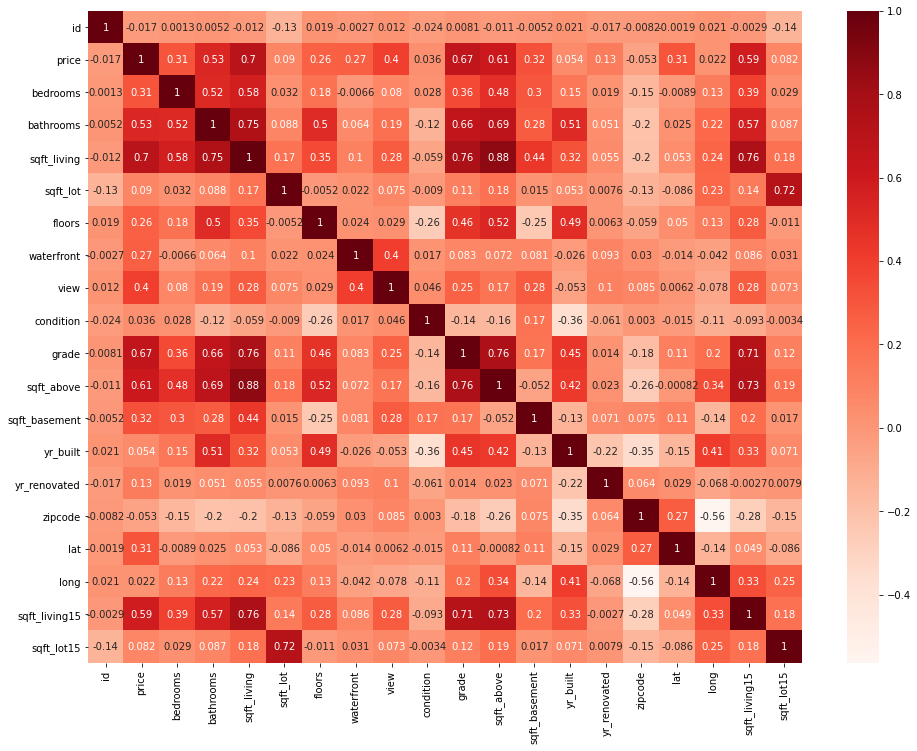

In [76]:
cor = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

# CORRELATION CONCLUSION
- Berdasarkan **hasil korelasi** diatas diketahui bahwa fitur yang paing berpengaruh terhadap harga rumah di King County yaitu **sqft_living (luas rumah) sebesar 70%**.
- Fitur yang akan digunakan selanjutnya untuk memprediksi harga rumah yang baru berdasarkan hasil korelasi yang bersesuaian yaitu **price, sqft_living, grade, sqft_above, bathrooms, sqft_basement, bedrooms, yr_built**

## **Penjelasan setiap kolom:**
1. price = Harga dari rumah (US$)
2. sqft_living = Luas rumah dalam satuan sqft
3. grade = Grading system dari pemerintah King County US
4. sqft_above = luas atap dalam satuan sqft
5. bathrooms = Jumlah kamar mandi
6. sqft_basement = luas basement dalam satuan sqft
7. bedrooms = Jumlah kamar tidur
8. yr_built = Tahun dimana rumah dibangun

## **Predict**
prediksikan berapa harga rumah baru jika : 
1. Jumlah bedrooms = 4
2. Jumlah bathrooms = 3
3. Luas rumahnya = 1500 sqft
4. Dengan grade 5
5. Tahun pembuatan rumahnya tahun 1992


# DATA PREPROCESSING

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [79]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- Pada fitur bathrooms terdapat nilai pecahan, aneh jika ada nilai jumlah kamar mandi pecahan. Maka diubah dulu jenis data yang semula float menjadi int.
- Pada fitur bedrooms terdapat nilai 33, ini sangat aneh karena jarang yang punya kamar 33 apalagi ini rumah pribadi. jadi kemungkinan itu typo dan akan diganti menjadi 3

In [80]:
#Mrubah tipe data dari bathrooms yang semula float menjadi int
df['bathrooms'] = df['bathrooms'].astype('int')

In [81]:
#Mengganti nilai 33 menjadi 3
df['bedrooms'] = df['bedrooms'].replace(33,3)

# DROP COLUMN

In [82]:
columns = ['condition','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','sqft_above','sqft_basement']
df.drop(columns, inplace=True, axis=1)

In [83]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,yr_built
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,7,1955
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,7,1951
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,6,1933
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,7,1965
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,8,1987


In [84]:
columns1 = ['id','date','sqft_lot','floors','waterfront','view']
df.drop(columns1, inplace=True, axis=1)

In [85]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  int64  
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1013.2 KB


# EXPLORATORY DATA ANALYSIS (EDA)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


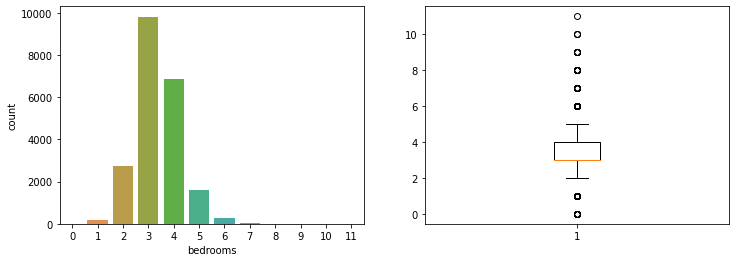

In [87]:
#Univariate analysis bedrooms
#Melihat distribusi dari bedrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])
plt.show()


- sebagian besar jumlah kamar tidur yaitu 3 dan 4.
- Data memiliki banyak outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


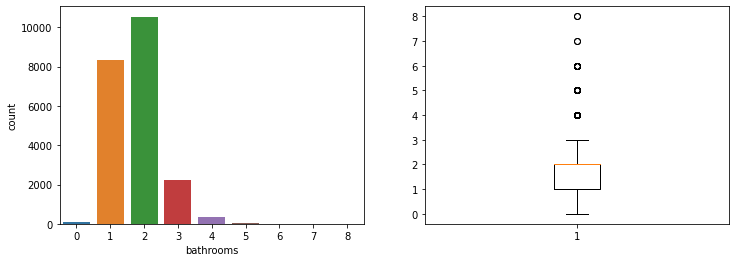

In [88]:
#Univariate analysis bathrooms
#Melihat distribusi dari bathrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bathrooms'])
plt.show()

- Jumlah kamar mandi paling banyak berada yaitu 1 dan 2.
-  ada rumah yang tidak ada kamar mandinya atau jumlahnya 0
- ada nilai outlier

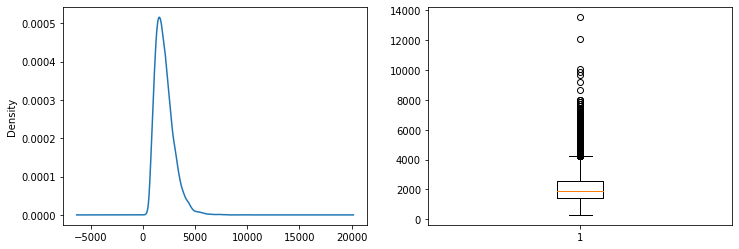

In [89]:
#Univariate analysis sqft_living
#Melihat distribusi dari sqft_living
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sqft_living'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['sqft_living'])
plt.show()

- Density dari distribusi luas rumah berada di sekitar 2000an.
- Banyak terdapat outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


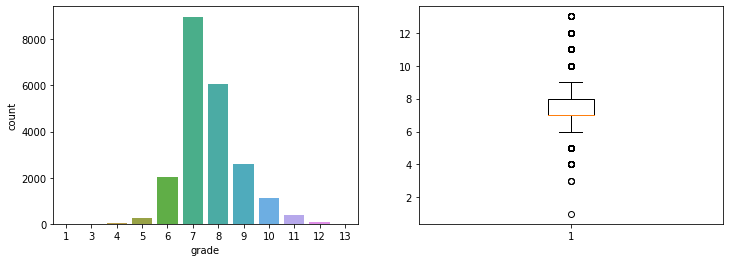

In [90]:
#Univariate analysis grade
#Melihat distribusi dari grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
plt.boxplot(df['grade'])
plt.show()

- Sebagian besar rumah di County King US memiliki grade 7 dan 8.
- Dilihat dari boxplot, data memiliki beberapa outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


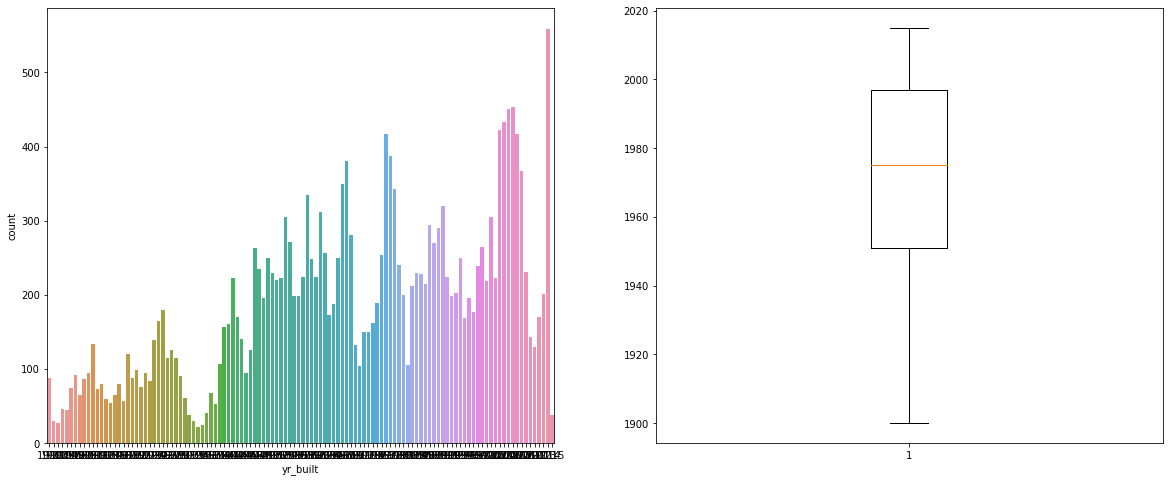

In [91]:
#Univariate analysis yr_built
#Melihat distribusi dari yr_built
f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(df['yr_built'])

f.add_subplot(1,2,2)
plt.boxplot(df['yr_built'])
plt.show()

- Dapat dilihat berdasarkan grafik diatas bahwa semakin tua umur dari rumah, maka semakin sedikit orang yang menjual rumahnya tersebut.
- Density terdapat di sekitar tahun 1980an.
- Data tidak memiliki outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

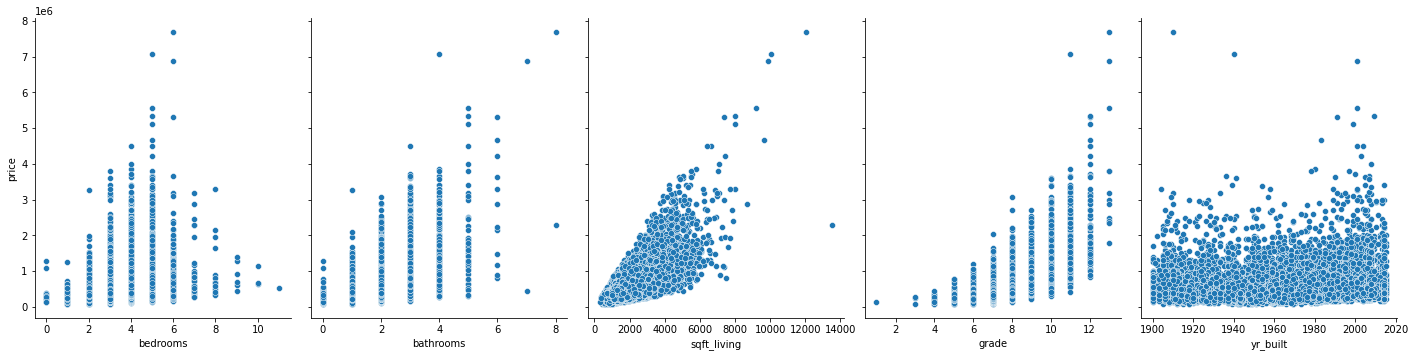

In [92]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(20,10))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.80)
plt.show()

In [93]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable
df.corr().style.background_gradient().set_precision(2)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00


- Dari tabel korelasi diatas, dapat dilihat bahwa sqft_living mempunyai hubungan linear positif yang sangat kuat dengan price jika dibandingkan yang lain.
- Nilai korelasi yr_built hampir mendekati nol yang menandakan bahwa usia rumah tidak mempengaruhi pada harga rumah.

# MODELLING

In [94]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [95]:
# Pertama, buat variabel x dan y
x = df.drop(columns='price')
y = df['price']

In [106]:
#Kedua, split data kita menjadi training and testing dengan porsi 90:10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

In [107]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19451, 5)
(19451,)
(2162, 5)
(2162,)


In [108]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [109]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-52332.78083075  62511.53337618    188.4630807  130702.95802906
  -3950.15768162]
6999892.481494787


In [111]:
#buat dataframe agar kebih rapi dan enak dibaca
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,bedrooms,-52332.780831
1,bathrooms,62511.533376
2,sqft_living,188.463081
3,grade,130702.958029
4,yr_built,-3950.157682


## **Nilai m dan b** 
Y = -52332,78x1 + 62511,53x2 + 188.46x3 + 130702,96x4 - 3950,16x5 + 6999892

In [103]:
y_pred = lin_reg.predict(x_test)

In [112]:
#Keenam, lihat accuracy score dari model menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.621608260510564

- Nilai accuracy untuk model yang telah dibuat yaitu 62%, sudah cukup baik

## **Prediction**
Yuk kita prediksi harga rumah sesuai dengan kriteria berikut :
1. Jumlah bedrooms = 4
2. Jumlah bathrooms = 3
3. Luas rumahnya = 1500 sqft
4. Dengan grade 5
5. Tahun pembuatan rumahnya tahun 1992

In [113]:
#Prediksi harga rumah 
lin_reg.predict([[4,3,1500,5,1992]])

array([45591.26772176])

### **Harga rumah baru dengan kriteria diatas adalah sekitar 45591 US$**